<a href="https://colab.research.google.com/github/danielsoy/ALOCC-CVPR2018/blob/master/vgg16_jason_browleen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

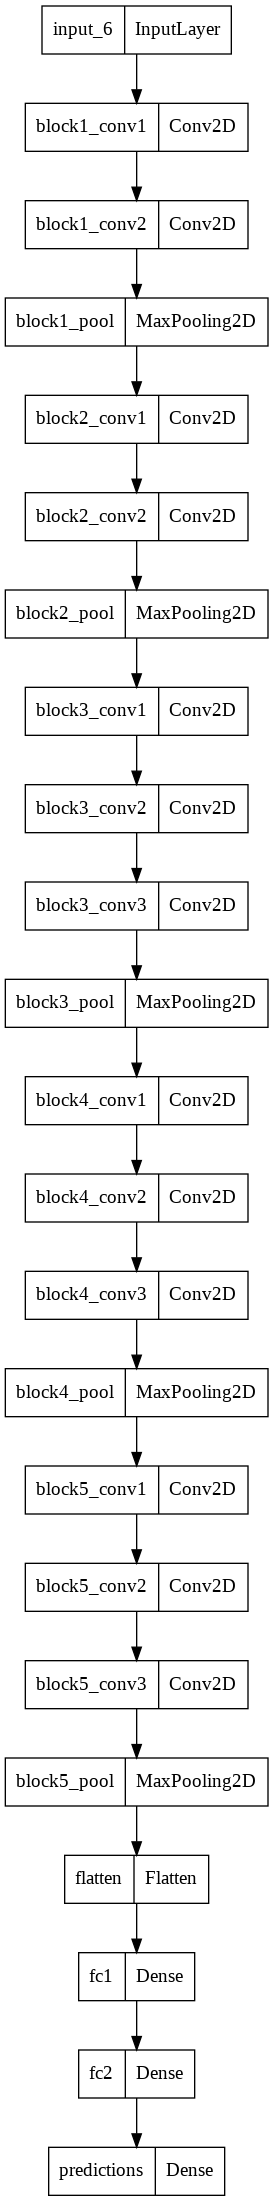

In [7]:
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg.png')

3. Load and Prepare Image
Next, we can load the image as pixel data and prepare it to be presented to the network.

Keras provides some tools to help with this step.

First, we can use the load_img() function to load the image and resize it to the required size of 224×224 pixels.

In [44]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('botella.jpg', target_size=(224, 224)) #resize it to the vgg16-net required size of 224×224 pixels.

Next, we can convert the pixels to a NumPy array so that we can work with it in Keras. We can use the img_to_array() function for this.

In [46]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array .crea un array , adaptado a la foto.
image = img_to_array(image)

The network expects one or more images as input; that means the input array will need to be 4-dimensional: samples, rows, columns, and channels.

We only have one sample (one image). We can reshape the array by calling reshape() and adding the extra dimension.

In [47]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

Next, the image pixels need to be prepared in the same way as the **ImageNet training data was prepared**. Specifically, from the paper:

The only preprocessing our VGG16 do is subtracting the mean RGB value, computed on the training set, from each pixel

In [48]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

 Make a Prediction
We can call the predict() function on the model in order to get a prediction of the probability of the image belonging to each of the 1000 known object types.

In [49]:
# predict the probability across all output classes
yhat = model.predict(image)

5. Interpret Prediction
Keras provides a function to interpret the probabilities called decode_predictions().

It can return a list of classes and their probabilities in case you would like to present the top 3 objects that may be in the photo.

We will just report the first most likely object.

In [50]:

from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

disk_brake (21.91%)
